<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/AUTOMATED-MACHINE-LEARNING/blob/master/AUTOML_with_H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# H2O's Automatic Machine Learning (AutoML)


H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability.

AutoML is a function in H2O that automates the process of building a large number of models, with the goal of finding the "best" model without any prior knowledge or effort by the Data Scientist.

H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.



# INSTALLATION

In [0]:
!pip install requests


In [0]:
!pip install tabulate


In [0]:
!pip install "colorama>=0.3.8"


In [0]:
!pip install future


In [0]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


# IMPORTING SOME LIBRARIES

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORTING THE DATASET

The dataset we are using is "Credit Card Fraud detection".

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [0]:
df = pd.read_csv('creditcard.csv')

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# VISUALISING THE DATASET

To understand the nature of the fraudulant transactions, plot the following graph

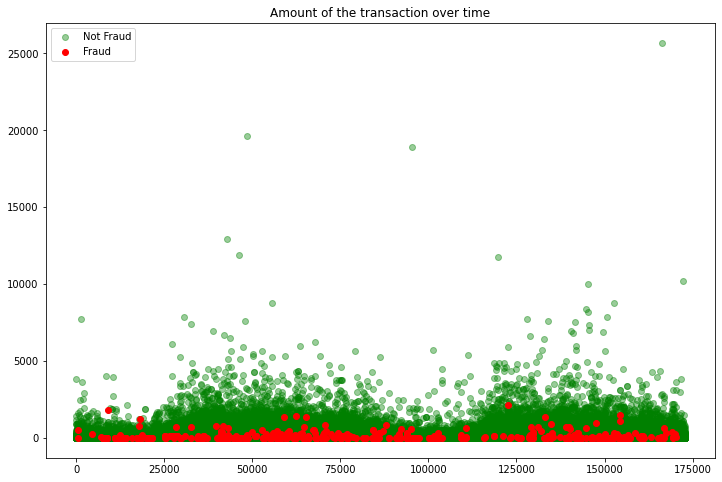

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(df[df.Class == 0].Time, df[df.Class == 0].Amount, c='green', alpha=0.4, label="Not Fraud")
plt.scatter(df[df.Class == 1].Time, df[df.Class == 1].Amount, c='red', label="Fraud")
plt.title("Amount of the transaction over time")
plt.legend()
plt.show()

# IMPORT h2o AUTOML

In [0]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML

# INTIALISING THE h2o SESSION

In [0]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_8grbyy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.757 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# LOADING THE DATA

In h2o, you need to import the dataset as an h2o object

In [0]:
df = h2o.import_file("creditcard.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [0]:
d = df.split_frame(ratios = [0.8], seed = 1234)
df_train = d[0] # using 80% for training
df_test = d[1] #rest 20% for testing

# PREDICTOR COLUMNS

Define a list of the columns we’ll use as predictors

In [0]:
predictors = list(df.columns) 
predictors.remove('Time')
predictors.remove('Class')

# CAST BINARY

We’re facing a binary classification problem here. The default case is regression in AutoML. To “cast” a column type to integer, we use

In [0]:
df_train['Class'] = df_train['Class'].asfactor()

# DEFINE AND TRAIN MODEL

We specify the maximal number of models to test, and the overall maximal runtime in seconds.

In [0]:
aml = H2OAutoML(max_models = 50, seed = 1, max_runtime_secs=3600)
aml.train(x = predictors, y = 'Class', training_frame = df_train, validation_frame = df_test)

AutoML progress: |
22:12:26.461: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


# DISPLAY ALL MODELS

Display all the models that have been tested and their performance


In [0]:
print(aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20200529_221226_model_1,0.965509,0.0031567,0.817204,0.0965108,0.0220388,0.000485709
GBM_5_AutoML_20200529_221226,0.935327,0.0214986,0.624078,0.168558,0.0381989,0.00145916
StackedEnsemble_BestOfFamily_AutoML_20200529_221226,0.92841,0.00321334,0.815162,0.108039,0.0216091,0.000466954
StackedEnsemble_AllModels_AutoML_20200529_221226,0.927067,0.00304145,0.829149,0.0939028,0.0208972,0.000436693
DeepLearning_1_AutoML_20200529_221226,0.924441,0.00879873,0.680886,0.113236,0.0257771,0.000664456
XGBoost_2_AutoML_20200529_221226,0.919859,0.182532,0.756911,0.120943,0.174014,0.0302808
GLM_1_AutoML_20200529_221226,0.917804,0.011735,0.724169,0.0991079,0.0412086,0.00169815
GBM_1_AutoML_20200529_221226,0.906063,0.00897459,0.704872,0.1119,0.0234079,0.00054793
XGBoost_3_AutoML_20200529_221226,0.904088,0.294512,0.751551,0.114512,0.279172,0.0779371
GBM_4_AutoML_20200529_221226,0.89921,0.0142085,0.675207,0.132514,0.03184,0.00101378


# PREDICTION

We can now make a prediction using the leader model

In [0]:
aml.leader.predict(df_test)


xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
0,0.99965,0.000349932
0,0.99965,0.000349932
0,0.999269,0.000731191
0,0.99965,0.000349932
0,0.999302,0.000698035
0,0.99965,0.000349932
0,0.99965,0.000349932
0,0.999239,0.000761216
0,0.99965,0.000349932
0,0.99965,0.000349932


# SAVE THE BEST MODEL


In [0]:
h2o.save_model(aml.leader, path = "./model_credit_card")

'/content/model_credit_card/XGBoost_grid__1_AutoML_20200529_221226_model_1'

# SHUT DOWN THE SESSION

Once your work is over, shut down the session

In [0]:
h2o.shutdown()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_b9dd closed.
